### 傅里叶变换与傅里叶逆变换
+ Task.1 以原幅频和相频对图像进行重建
+ Task.2 以幅频为1，相频不变对图像进行重建
+ Task.3 以幅频不变，相频为0对图像进行重建

In [1]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("1.PNG",0)                                     #读取原图像

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)   #得到原图像的K空间矩阵(u,v)，其中u，v是代表频率大小和波的方向，而矩阵的值则是一个复数
dft_shift = np.fft.fftshift(dft)                                #将频域从中间移动到左上角

magn = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])
magnitude_s = 255*np.log(1+magn)/np.log(np.max(magn))           #将原图像的频谱图映射到0-255的区间


dftShift_Magn1 = dft_shift.copy()
dftShift_phase0 = dft_shift.copy()

for y in range(dft_shift.shape[0]):
    for x in range(dft_shift.shape[1]):
        a = dft_shift[y][x][0]
        b = dft_shift[y][x][1]
        # task.2 以幅频为1进行重建
        theta = math.atan2(b,a)
        dftShift_phase0[y][x][0] = math.cos(theta)
        dftShift_phase0[y][x][1] = math.sin(theta)
        # task.3 以相频为0进行重建
        dftShift_Magn1[y][x][0] = math.sqrt(a*a+b*b)
        dftShift_Magn1[y][x][1] = 0

idft = np.fft.ifftshift(dft_shift)
ifimg = cv2.idft(idft)
ifimg = cv2.magnitude(ifimg[:,:,0],ifimg[:,:,1])

idft_phase0 = np.fft.ifftshift(dftShift_phase0)
ifimg_phase0 = cv2.idft(idft_phase0)
ifimg_phase0 = cv2.magnitude(ifimg_phase0[:,:,0],ifimg_phase0[:,:,1])

idft_Magn1 = np.fft.ifftshift(dftShift_Magn1)
ifimg_Magn1 = cv2.idft(idft_Magn1)
#ifimg_Magn1 = cv2.magnitude(ifimg_Magn1[:,:,0],ifimg_Magn1[:,:,1])
magn_Magn1 = cv2.magnitude(ifimg_Magn1[:,:,0],ifimg_Magn1[:,:,1])
ifimg_Magn1 = 255 * np.log(1 + magn_Magn1) / np.log(np.max(magn_Magn1))

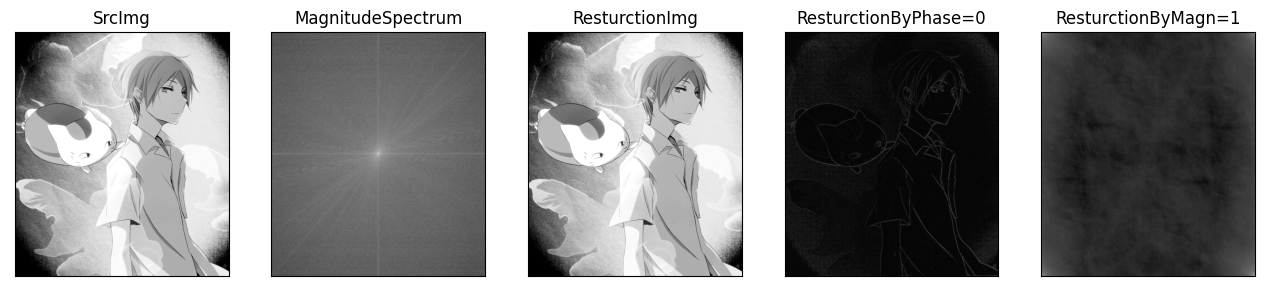

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(151),plt.imshow(img, cmap = "gray")
plt.title("SrcImg"), plt.xticks([]), plt.yticks([])
plt.subplot(152),plt.imshow(magnitude_s, cmap = 'gray')
plt.title("MagnitudeSpectrum"), plt.xticks([]), plt.yticks([])
plt.subplot(153),plt.imshow(ifimg, cmap = 'gray')
plt.title("ResturctionImg"), plt.xticks([]), plt.yticks([])
plt.subplot(154),plt.imshow(ifimg_phase0, cmap = 'gray')
plt.title("ResturctionByPhase=0"), plt.xticks([]), plt.yticks([])
plt.subplot(155),plt.imshow(ifimg_Magn1, cmap = 'gray')
plt.title("ResturctionByMagn=1"), plt.xticks([]), plt.yticks([])
plt.show()

对比上面三幅不同方式重建得到的图像可知：
+ 当幅频为1，而相频不变的时候，原图像的轮廓大概是可以得到的，因为幅频只会影响不同波的加权，有了幅频的加权之后，重建的图像对比度会明显提高
+ 当幅频不变，而相频为0的时候，相频为0相当于所有的平面波在相加的时候都没有移位，所有重建后的图像一定是呈周期状的，并且图像中心应该是一个最亮的点，因为每一个波在原点都会经过此点，但是从实验结果来看并没有出现该现象，还未发现是什么原因。